In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
vinhos = pd.read_csv('wine_dataset.csv')
vinhos.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# vamos trocar a colona style por valores binarios, pois é esta que queremos prever
label_encoder = LabelEncoder()
vinhos['style_numeric'] = label_encoder.fit_transform(vinhos['style'])

In [4]:
vinhos.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,style_numeric
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [5]:
#verificando valores missing
vinhos.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
style_numeric           0
dtype: int64

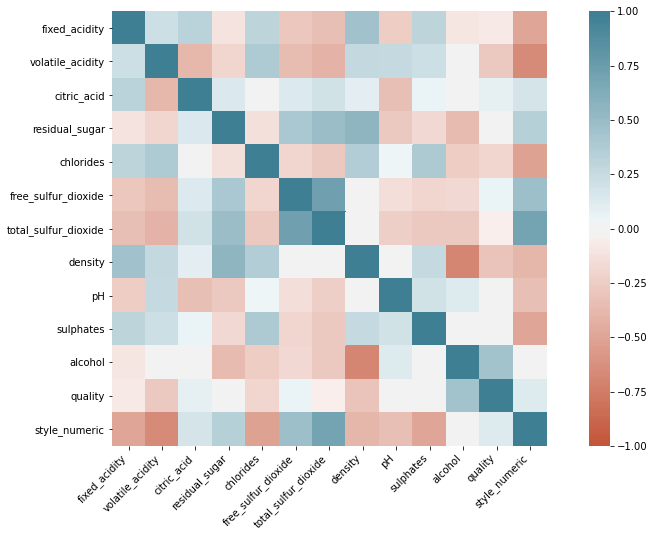

In [6]:
# verificar o nível de correlação entre as variáveis
plt.figure(figsize=(15,8)) 
corr = vinhos.corr() 
ax = sns.heatmap(     
     corr,      
     vmin=-1, vmax=1, center=0,     
     cmap=sns.diverging_palette(20, 220, n=200),     
     square=True 
) 
ax.set_xticklabels(     
     ax.get_xticklabels(),     
     rotation=45,     
     horizontalalignment='right' 
);

In [7]:
# separar em treino e teste
x = vinhos.drop(['style','style_numeric'], axis = 1)
y = vinhos['style_numeric']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [9]:
random_forest = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=0)
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [10]:
random_result = random_forest.predict(X_test)
random_result 

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
from sklearn.metrics import accuracy_score
print('A precisão do random_forest é de: ',round(accuracy_score(random_result,y_test),4)*100,'%')

A precisão do random_forest é de:  99.69 %


0.9969230769230769

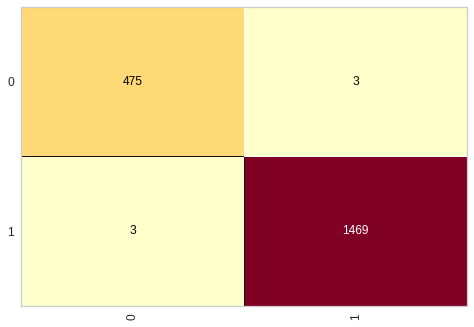

In [12]:
# visualizando o desempenho do algoritmo
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

In [13]:
# Agora vamos ver o Naive_bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [14]:
naive_result = naive_bayes.predict(X_test)
naive_result

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
print('A precisão do Naive Bayes é de: ',round(accuracy_score(naive_result,y_test),2)*100,'%')

A precisão do Naive Bayes é de:  98.0 %


0.9784615384615385

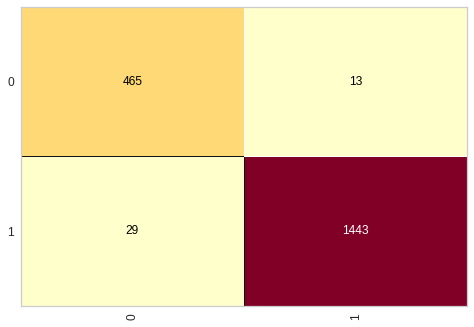

In [16]:
# visualizando o desempenho do algoritmo
#Podemos concluir que o Naive Bayes erra muito mais que o Random Forest
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)